In [24]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [26]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Tambahkan max_depth biar pohon tidak terlalu besar
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [27]:
y_pred = model.predict(x_test)

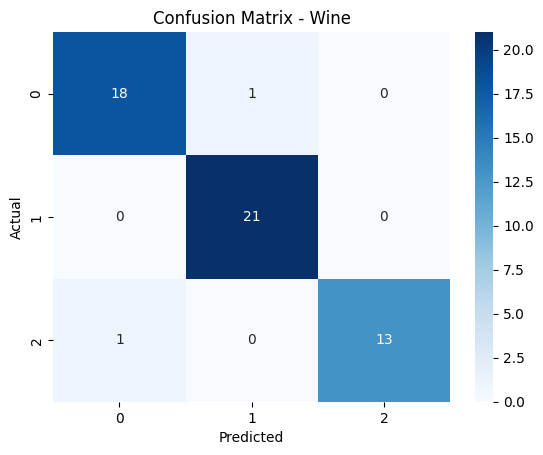

In [34]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Wine")
plt.show()

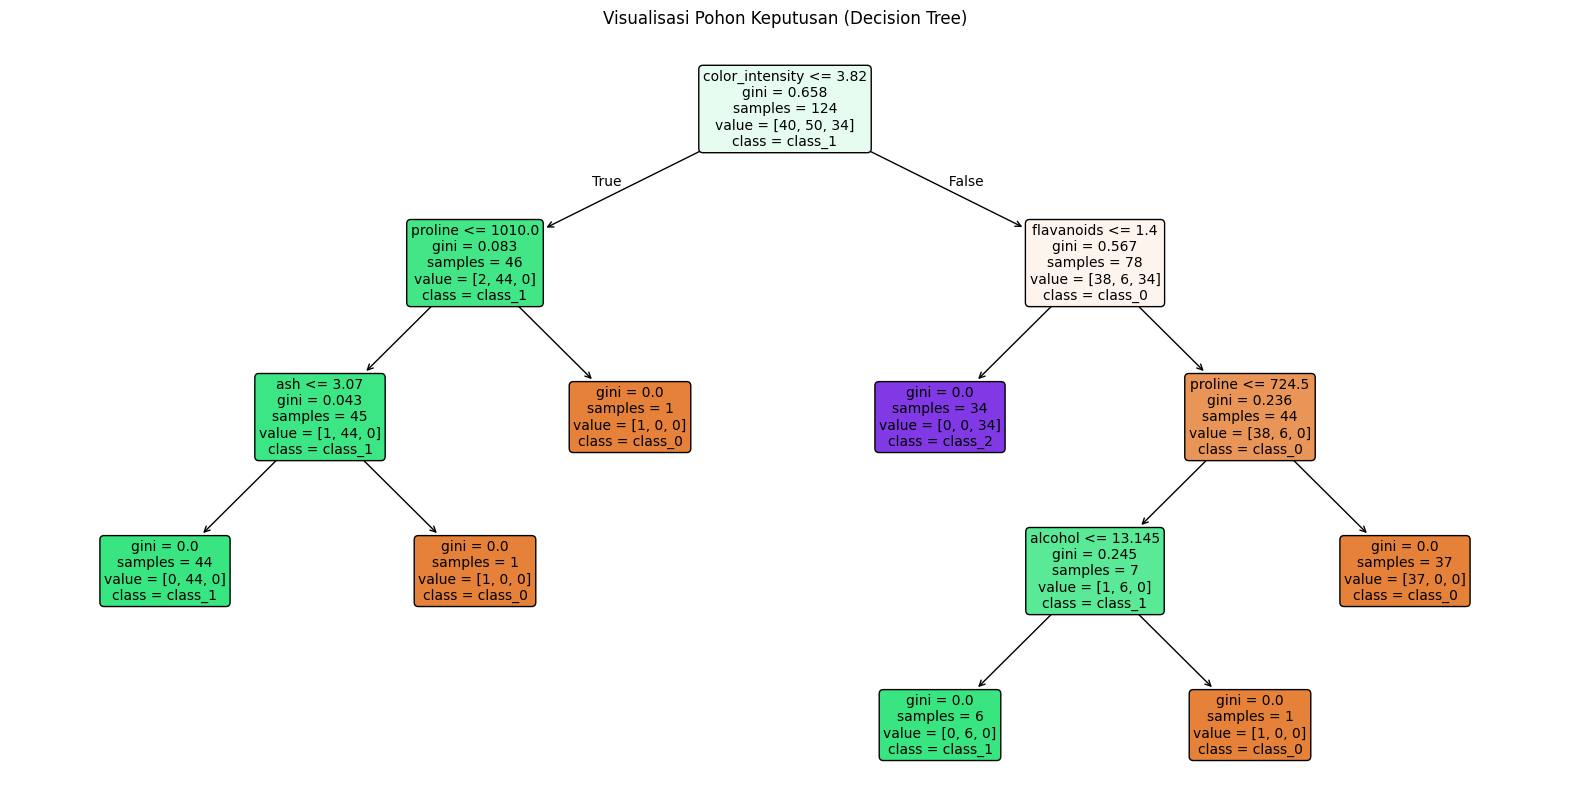

In [28]:
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=wine.feature_names,
          class_names=wine.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show()

In [30]:
wine_test_data = {
    'alcohol': 13.2,
    'malic_acid': 2.36,
    'ash': 2.3,
    'alcalinity_of_ash': 18.5,
    'magnesium': 98,
    'total_phenols': 2.5,
    'flavanoids': 2.3,
    'nonflavanoid_phenols': 0.26,
    'proanthocyanins': 1.2,
    'color_intensity': 5.5,
    'hue': 1.04,
    'od280/od315_of_diluted_wines': 3.0,
    'proline': 1065
}

In [31]:
wine_input_df = pd.DataFrame([wine_test_data])
prediction = model.predict(wine_input_df[wine.feature_names])
print("Prediksi class:", prediction)
print("Prediksi label:", wine.target_names[prediction[0]])

Prediksi class: [0]
Prediksi label: class_0
